### RQ3.Was the performance the same between public and private schools?

### RQ4.Was school performance the same for urban and rural schools?

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/performance_data_pass.csv')
data

,Ano,Localização,Rede,Total - EF,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EM,1EM,2EM,3EM,4EM,Não-Seriado
0,2020,Urbana,Total,98.2,98.1,98.5,98.4,98.7,98.7,97.7,97.8,98.0,97.9,95.0,94.1,95.8,95.5,85.7,90.2
1,2020,Rural,Total,98.1,99.2,99.1,98.4,98.4,97.7,97.3,97.4,97.5,97.3,95.0,94.1,96.0,95.4,86.2,94.7
2,2019,Urbana,Total,93.4,98.6,97.7,92.4,95.3,95.7,88.8,89.6,91.4,92.5,86.1,80.5,87.3,92.5,88.9,86.0
3,2019,Rural,Total,89.1,97.8,96.4,85.9,87.9,88.8,81.4,85.4,88.1,91.4,85.8,81.1,86.9,91.7,88.7,80.7
4,2018,Urbana,Total,92.1,98.2,97.5,91.0,94.2,94.8,86.8,87.6,89.7,90.7,83.4,76.6,84.9,90.5,87.4,81.2
5,2018,Rural,Total,87.6,97.3,96.3,84.2,86.2,86.9,79.1,83.1,86.5,89.8,84.4,78.9,85.6,90.7,93.0,80.1
6,2017,Urbana,Total,91.6,98.2,97.5,90.6,94.1,94.4,85.4,86.9,89.0,89.6,83.0,76.2,84.6,90.5,85.0,85.3
7,2017,Rural,Total,87.4,97.1,96.0,84.0,86.3,86.7,78.3,83.2,86.4,89.6,84.2,78.9,85.5,90.8,90.7,80.0
8,2016,Rural,Total,86.1,96.9,95.6,82.4,84.7,85.0,76.5,81.8,84.9,88.7,83.0,77.1,84.4,90.0,93.2,79.8
9,2016,Urbana,Total,90.4,97.9,97.1,89.6,93.2,93.4,83.8,85.4,87.0,88.3,81.5,74.0,83.1,89.7,85.8,85.6


In [4]:
data.Ano.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007])

In [3]:
urban_rural_data = data[(data.Localização == 'Urbana') | (data.Localização == 'Rural')]
public_private_data = data[(data.Rede == 'Privada') | (data.Rede == 'Pública')]

In [8]:
urban_rural_data

,Ano,Localização,Rede,Total - EF,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EM,1EM,2EM,3EM,4EM,Não-Seriado
0,2020,Urbana,Total,98.2,98.1,98.5,98.4,98.7,98.7,97.7,97.8,98.0,97.9,95.0,94.1,95.8,95.5,85.7,90.2
1,2020,Rural,Total,98.1,99.2,99.1,98.4,98.4,97.7,97.3,97.4,97.5,97.3,95.0,94.1,96.0,95.4,86.2,94.7
2,2019,Urbana,Total,93.4,98.6,97.7,92.4,95.3,95.7,88.8,89.6,91.4,92.5,86.1,80.5,87.3,92.5,88.9,86.0
3,2019,Rural,Total,89.1,97.8,96.4,85.9,87.9,88.8,81.4,85.4,88.1,91.4,85.8,81.1,86.9,91.7,88.7,80.7
4,2018,Urbana,Total,92.1,98.2,97.5,91.0,94.2,94.8,86.8,87.6,89.7,90.7,83.4,76.6,84.9,90.5,87.4,81.2
5,2018,Rural,Total,87.6,97.3,96.3,84.2,86.2,86.9,79.1,83.1,86.5,89.8,84.4,78.9,85.6,90.7,93.0,80.1
6,2017,Urbana,Total,91.6,98.2,97.5,90.6,94.1,94.4,85.4,86.9,89.0,89.6,83.0,76.2,84.6,90.5,85.0,85.3
7,2017,Rural,Total,87.4,97.1,96.0,84.0,86.3,86.7,78.3,83.2,86.4,89.6,84.2,78.9,85.5,90.8,90.7,80.0
8,2016,Rural,Total,86.1,96.9,95.6,82.4,84.7,85.0,76.5,81.8,84.9,88.7,83.0,77.1,84.4,90.0,93.2,79.8
9,2016,Urbana,Total,90.4,97.9,97.1,89.6,93.2,93.4,83.8,85.4,87.0,88.3,81.5,74.0,83.1,89.7,85.8,85.6


In [9]:
public_private_data

,Ano,Localização,Rede,Total - EF,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EM,1EM,2EM,3EM,4EM,Não-Seriado
28,2020,Total,Privada,97.3,93.9,96.1,96.9,97.6,98.0,98.0,98.4,98.7,98.8,98.8,98.3,99.1,99.4,83.0,93.1
29,2020,Total,Pública,98.4,99.3,99.2,98.7,98.9,98.6,97.6,97.6,97.8,97.7,94.4,93.6,95.3,94.9,85.9,91.0
30,2019,Total,Privada,98.2,98.7,99.0,98.8,98.9,98.8,97.4,97.0,97.1,97.1,96.4,94.0,96.8,98.6,97.4,95.9
31,2019,Total,Pública,91.7,98.4,97.2,89.8,93.1,93.8,86.2,87.7,89.9,91.5,84.7,78.7,85.9,91.6,88.5,84.0
32,2018,Total,Privada,98.0,98.5,98.9,98.7,98.8,98.8,97.3,96.6,96.8,96.7,96.0,93.5,96.5,98.5,89.0,94.4
33,2018,Total,Pública,90.2,98.0,97.0,88.1,91.7,92.5,83.8,85.4,87.9,89.5,81.7,74.5,83.3,89.3,87.6,80.1
34,2017,Total,Privada,97.7,98.3,98.7,98.5,98.6,98.6,96.9,96.3,96.5,96.3,95.7,92.9,96.2,98.3,94.8,94.4
35,2017,Total,Pública,89.6,97.9,96.9,87.7,91.7,92.1,82.4,84.8,87.3,88.4,81.4,74.3,83.1,89.3,84.9,83.5
36,2016,Total,Privada,97.3,98.1,98.5,98.4,98.4,98.3,96.3,95.6,95.8,95.7,95.0,91.7,95.6,98.1,95.9,93.3
37,2016,Total,Pública,88.3,97.7,96.5,86.4,90.4,90.8,80.6,83.1,85.2,87.1,79.6,71.9,81.3,88.3,85.7,83.6


In [13]:
urban = urban_rural_data[urban_rural_data.Localização == 'Urbana']
rural = urban_rural_data[urban_rural_data.Localização == 'Rural']

<AxesSubplot:xlabel='Ano', ylabel='Total - EF'>

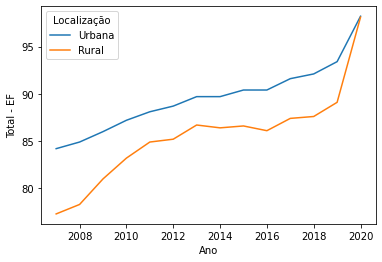

In [4]:
#elementary school
#TODO title, sd, size, axis, add 2007
sns.lineplot(data=urban_rural_data, x='Ano', y='Total - EF', hue='Localização')

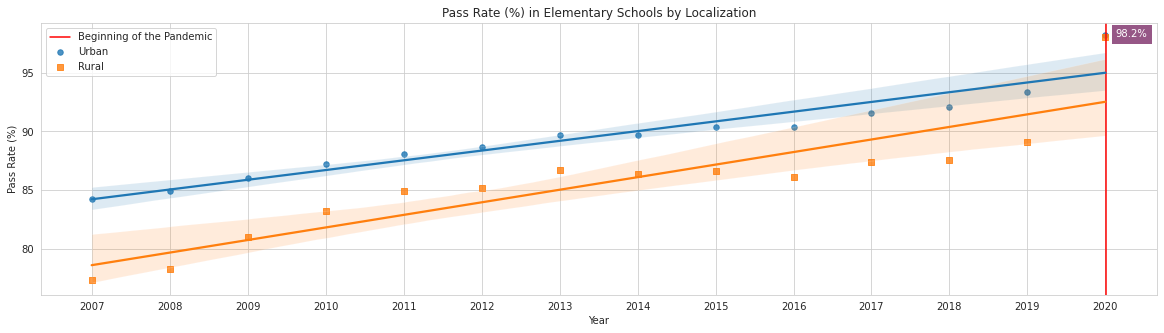

In [18]:
x_shift = 0.13
y_shift = 0.15
markersize=30

plt.figure(figsize=(20,5))
plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
sns.set_style("whitegrid")
ax = sns.regplot(data=urban, x='Ano', y='Total - EF', label="Urban", marker="o", scatter_kws={'s':markersize})

ax.set(xticks=urban.Ano.values)

sns.regplot(data=rural, x='Ano', y='Total - EF', label="Rural", marker="s", scatter_kws={'s':markersize})

plt.title("Pass Rate (%) in Elementary Schools by Localization")
plt.ylabel("Pass Rate (%)")
plt.xlabel("Year")

y_2020_urban = urban[urban.Ano == 2020]['Total - EF'].iloc[0]
plt.text(2020 + x_shift, y_2020_urban - y_shift, '{:.1f}%'.format(y_2020_urban), color='white').set_backgroundcolor('#965786')

y_2020_rural = urban[urban.Ano == 2020]['Total - EF'].iloc[0]
plt.text(2020 + x_shift, y_2020_rural - y_shift, '{:.1f}%'.format(y_2020_rural), color='white').set_backgroundcolor('#965786')

plt.legend()
plt.show()

<AxesSubplot:xlabel='Ano', ylabel='Total - EM'>

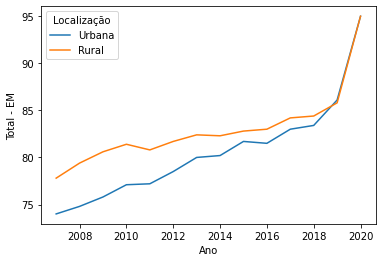

In [5]:
#high school
sns.lineplot(data=urban_rural_data, x='Ano', y='Total - EM', hue='Localização')

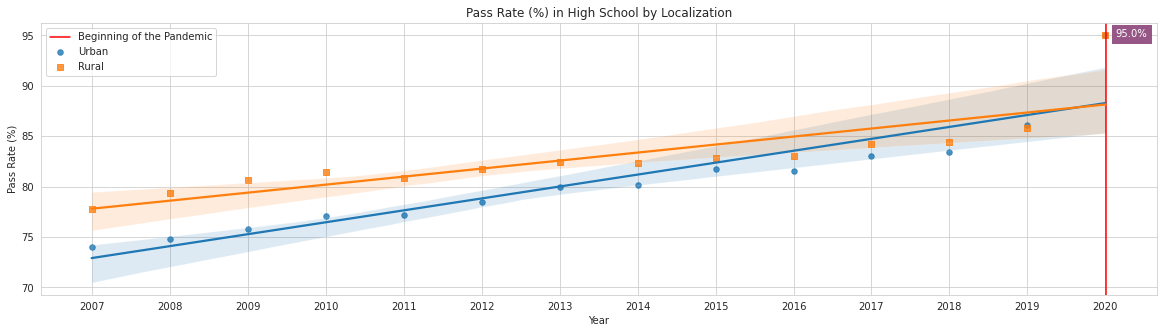

In [23]:
plt.figure(figsize=(20,5))
plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
sns.set_style("whitegrid")
ax = sns.regplot(data=urban, x='Ano', y='Total - EM', label="Urban", marker="o", scatter_kws={'s':markersize})

ax.set(xticks=urban.Ano.values)

sns.regplot(data=rural, x='Ano', y='Total - EM', label="Rural", marker="s", scatter_kws={'s':markersize})

plt.title("Pass Rate (%) in High School by Localization")
plt.ylabel("Pass Rate (%)")
plt.xlabel("Year")

y_2020_urban = urban[urban.Ano == 2020]['Total - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_urban - y_shift, '{:.1f}%'.format(y_2020_urban), color='white').set_backgroundcolor('#965786')

y_2020_rural = urban[urban.Ano == 2020]['Total - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_rural - y_shift, '{:.1f}%'.format(y_2020_rural), color='white').set_backgroundcolor('#965786')

plt.legend()
plt.show()

In [ ]:
private = public_private_data[public_private_data.Rede == 'Privada']
public = publ[public_private_data.Rede == 'Pública']

<AxesSubplot:xlabel='Ano', ylabel='Total - EF'>

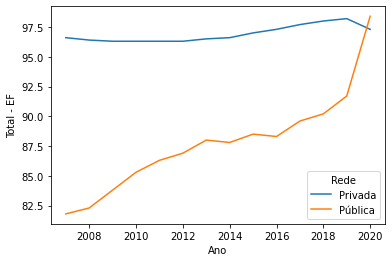

In [6]:
#elementary school
sns.lineplot(data=public_private_data, x='Ano', y='Total - EF', hue='Rede')

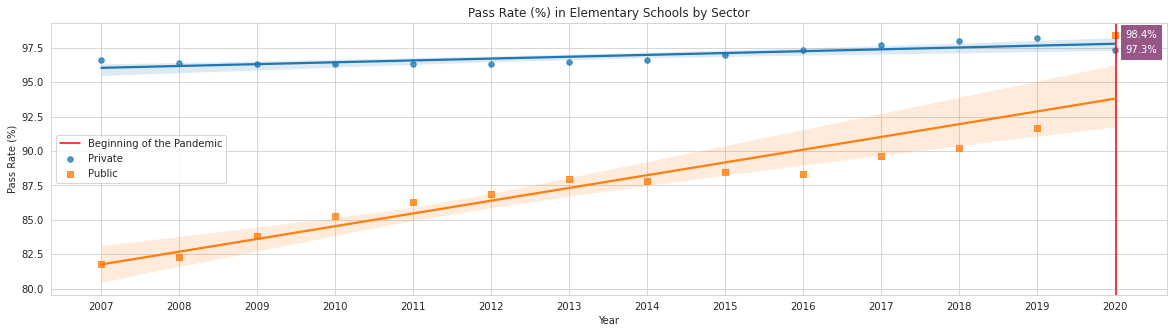

In [21]:
plt.figure(figsize=(20,5))
plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
sns.set_style("whitegrid")
ax = sns.regplot(data=private, x='Ano', y='Total - EF', label="Private", marker="o", scatter_kws={'s':markersize})

ax.set(xticks=public.Ano.values)

sns.regplot(data=public, x='Ano', y='Total - EF', label="Public", marker="s", scatter_kws={'s':markersize})

plt.title("Pass Rate (%) in Elementary Schools by Sector")
plt.ylabel("Pass Rate (%)")
plt.xlabel("Year")

y_2020_private = private[private.Ano == 2020]['Total - EF'].iloc[0]
plt.text(2020 + x_shift, y_2020_private - y_shift, '{:.1f}%'.format(y_2020_private), color='white').set_backgroundcolor('#965786')

y_2020_public = public[public.Ano == 2020]['Total - EF'].iloc[0]
plt.text(2020 + x_shift, y_2020_public - y_shift, '{:.1f}%'.format(y_2020_public), color='white').set_backgroundcolor('#965786')

plt.legend()
plt.show()

<AxesSubplot:xlabel='Ano', ylabel='Total - EM'>

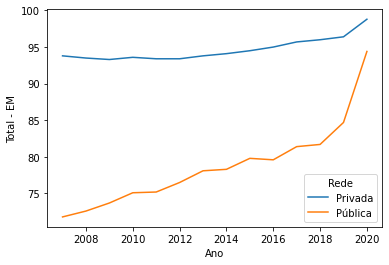

In [7]:
#high school
sns.lineplot(data=public_private_data, x='Ano', y='Total - EM', hue='Rede')

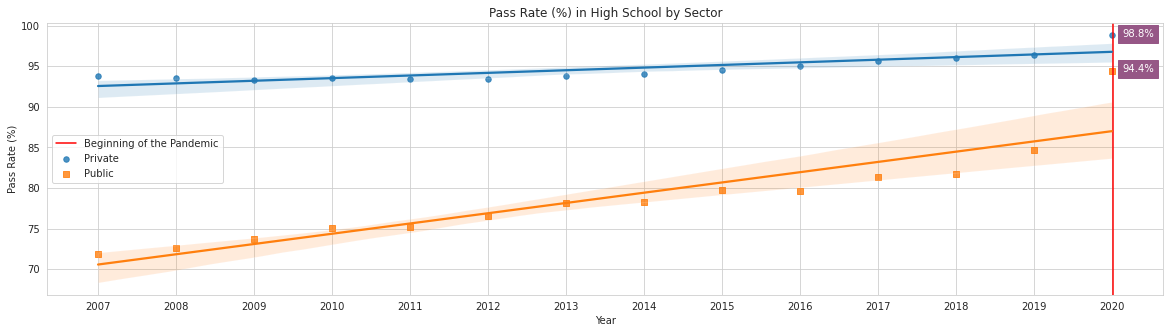

In [22]:
plt.figure(figsize=(20,5))
plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
sns.set_style("whitegrid")
ax = sns.regplot(data=private, x='Ano', y='Total - EM', label="Private", marker="o", scatter_kws={'s':markersize})

ax.set(xticks=public.Ano.values)

sns.regplot(data=public, x='Ano', y='Total - EM', label="Public", marker="s", scatter_kws={'s':markersize})

plt.title("Pass Rate (%) in High School by Sector")
plt.ylabel("Pass Rate (%)")
plt.xlabel("Year")

y_2020_private = private[private.Ano == 2020]['Total - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_private - y_shift, '{:.1f}%'.format(y_2020_private), color='white').set_backgroundcolor('#965786')

y_2020_public = public[public.Ano == 2020]['Total - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_public - y_shift, '{:.1f}%'.format(y_2020_public), color='white').set_backgroundcolor('#965786')

plt.legend()
plt.show()